# Proyecto de Análisis de Calidad del Aire en la Ciudad de Nueva York
# Paso 1: Objetivos del Proyecto
El objetivo principal de este proyecto es analizar y visualizar la situación actual de la calidad del aire en la ciudad de Nueva York.

Para alcanzar el objetivo general, se necesita desglosar en preguntas específicas que puedan responder a través del análisis. Estas preguntas guiarán en la obtención de información concreta: 
- "¿Cómo ha evolucionado la calidad del aire en la ciudad de Nueva York en los últimos años?" 
- "¿Existe una correlación entre la calidad del aire y las tasas de enfermedades respiratorias en ciertas áreas de la ciudad?".

# Paso 2: Recopilación de datos
Se recopilan los datos, para ello se descarga el archivo CSV del conjunto de datos desde la fuente oficial que es el Portal de Datos de la Ciudad de Nueva York.

La contaminación del aire es una de las amenazas ambientales más importantes para las poblaciones urbanas y, si bien todas las personas están expuestas, las emisiones contaminantes, los niveles de exposición y la vulnerabilidad de la población varían según los vecindarios. La exposición a contaminantes atmosféricos comunes se ha relacionado con enfermedades respiratorias y cardiovasculares, cánceres y muertes prematuras. Estos indicadores brindan una perspectiva a lo largo del tiempo y las geografías de la ciudad de Nueva York para caracterizar mejor la calidad del aire y la salud en la ciudad de Nueva York.

# Paso 3: Comprender la estructura de datos
## Visualización de las Primeras Filas del Conjunto de Datos

En la siguiente celda, se muestra cómo cargar un archivo CSV de datos y visualizar las primeras filas del conjunto de datos. Esto nos permite obtener una vista previa de los datos antes de realizar un análisis más detallado.

In [139]:
import pandas as pd

# Lee el archivo CSV en un DataFrame
df = pd.read_csv('Calidad_del_aire.csv')

# Muestra las primeras filas (por defecto, muestra las primeras 5 filas)
print(df.head())

   Unique ID  Indicator ID                  Name Measure Measure Info  \
0     216498           386            Ozone (O3)    Mean          ppb   
1     216499           386            Ozone (O3)    Mean          ppb   
2     219969           386            Ozone (O3)    Mean          ppb   
3     219970           386            Ozone (O3)    Mean          ppb   
4     164876           383  Sulfur Dioxide (SO2)    Mean          ppb   

  Geo Type Name  Geo Join ID                    Geo Place Name  \
0            CD          313               Coney Island (CD13)   
1            CD          313               Coney Island (CD13)   
2       Borough            1                             Bronx   
3       Borough            1                             Bronx   
4            CD          211  Morris Park and Bronxdale (CD11)   

      Time Period  Start_Date  Data Value  Message  
0     Summer 2013  06/01/2013       34.64      NaN  
1     Summer 2014  06/01/2014       33.22      NaN  
2    

Por lo tanto, cada fila en este conjunto de datos representa una medición de un contaminante específico del aire (como el ozono o el dióxido de azufre), en un lugar y tiempo específicos, junto con información adicional sobre la medición. Por ejemplo, la primera fila indica que la concentración media de ozono en Coney Island (CD13) en el verano de 2013 fue de 34.64 ppb.

## Obtener información sobre las columnas y tipos de datos

El resultado de df.info() proporcionará una visión general de la estructura del conjunto de datos, ayudando a comprender cuántas columnas tengo, cuántos valores faltantes hay y qué tipos de datos se encuentran en cada columna. Esta información es esencial para la limpieza, análisis y visualización de datos en el proyecto de ciencia de datos.

In [140]:
# Muestra información sobre las columnas y tipos de datos
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16122 entries, 0 to 16121
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unique ID       16122 non-null  int64  
 1   Indicator ID    16122 non-null  int64  
 2   Name            16122 non-null  object 
 3   Measure         16122 non-null  object 
 4   Measure Info    16122 non-null  object 
 5   Geo Type Name   16122 non-null  object 
 6   Geo Join ID     16122 non-null  int64  
 7   Geo Place Name  16122 non-null  object 
 8   Time Period     16122 non-null  object 
 9   Start_Date      16122 non-null  object 
 10  Data Value      16122 non-null  float64
 11  Message         0 non-null      float64
dtypes: float64(2), int64(3), object(7)
memory usage: 1.5+ MB
None


El DataFrame tiene 16122 filas (entradas) y 12 columnas (características).
Las columnas y sus tipos de datos son los siguientes:

La columna Message no tiene ningún valor no nulo.
El DataFrame está utilizando aproximadamente 1.5+ MB de memoria. 

## Descripción de estadísticas básicas

La función describe() en Pandas es útil para obtener estadísticas básicas de las columnas numéricas en un DataFrame. Esta información es esencial para comprender la distribución y variabilidad de los datos numéricos en un conjunto de datos. Proporciona una vista general de la tendencia central, la dispersión y los valores extremos en los datos, lo que es fundamental para el análisis y la toma de decisiones en un proyecto de ciencia de datos.

In [141]:
# Muestra estadísticas básicas de columnas numéricas
print(df.describe())

           Unique ID  Indicator ID   Geo Join ID    Data Value  Message
count   16122.000000  16122.000000  1.612200e+04  16122.000000      0.0
mean   339480.955589    427.131063  6.133394e+05     19.129163      NaN
std    194099.809551    109.657607  7.916715e+06     21.673789      NaN
min    130355.000000    365.000000  1.000000e+00      0.000000      NaN
25%    172183.250000    365.000000  2.020000e+02      8.460000      NaN
50%    221882.500000    375.000000  3.030000e+02     13.900000      NaN
75%    547749.750000    386.000000  4.040000e+02     25.470000      NaN
max    671122.000000    661.000000  1.051061e+08    424.700000      NaN


Este resumen muestra una visión general rápida de la distribución de los datos en cada columna, incluyendo la media, la mediana, el rango intercuartil y los valores mínimos y máximos.

## Identificar las columnas relevantes
Se determina qué columnas son relevantes para los objetivos de análisis. Si algunas columnas no son útiles para el proyecto, se puede optar por eliminarlas más adelante en el proceso de limpieza de datos.

- Análisis de la Calidad del Aire por Indicador: Se puede analizar la calidad del aire en Nueva York para indicadores específicos, como el ozono (O3) o el dióxido de azufre (SO2). Se podría investigar las tendencias a lo largo del tiempo, identificar áreas geográficas con altos niveles de contaminación y evaluar la variabilidad de la calidad del aire. 

    - Name: Este es el nombre del indicador de calidad del aire. Por ejemplo, podría ser el nombre de un contaminante específico como el ozono (O3) o el dióxido de azufre (SO2).

    - Measure: Esta columna indica cómo se mide el indicador. Podría ser la media, la mediana, el máximo, etc.

    - Geo Type Name: es el nombre del tipo de geografía en el que se realizó la medición. Podría ser borough o CD.

    - Geo Place Name: Este es el nombre del lugar geográfico donde se realizó la medición. Podría ser el nombre de una ciudad, un barrio o una región específica.

    - Time Period: Este es el período de tiempo durante el cual se realizó la medición. Podría ser una temporada específica (como verano o invierno) o un año específico.

    - Start_Date: fecha exacta en que se realizó la medición.

    - Data Value: el valor de la medición.

- Impacto en la Salud Pública: Se accede a datos de salud pública, se puede investigar la relación entre la calidad del aire y los problemas de salud en la población, como enfermedades respiratorias. 

    - Indicator ID: Este es un identificador para el tipo de indicador de calidad del aire que se está midiendo. Por ejemplo, diferentes contaminantes.

    - Data Value: el valor de la medición.

## Identificar una Columna con Valores Únicos
Examinar las columnas para encontrar una que contenga valores únicos. Se puede utilizar la función nunique() para contar cuántos valores únicos hay en cada columna.

In [142]:
# Identifica cuántos valores únicos hay en cada columna
unique_counts = df.nunique()

# Muestra los conteos de valores únicos
print(unique_counts)

Unique ID         16122
Indicator ID         22
Name                 19
Measure               8
Measure Info          8
Geo Type Name         5
Geo Join ID          72
Geo Place Name      114
Time Period          45
Start_Date           36
Data Value         4086
Message               0
dtype: int64


## Selecciona la Columna con Valores Únicos
Basándome en los resultados del paso anterior, selecciono la columna que tiene un conteo de valores únicos igual al número total de filas en el conjunto de datos. Esto indica que todos los valores en esa columna son únicos y los puedo usar como clave primaria.

In [143]:
# Establece la columna "ID" como clave primaria
clave_primaria = "ID"

## Buscar relaciones entre columnas
## Examina las relaciones
Examinar si hay relaciones lógicas o conexiones entre las columnas.

In [144]:
import pandas as pd

# Carga los datos desde el archivo CSV
df = pd.read_csv('Calidad_del_aire.csv')

# Examina la relación entre "Geo Place Name" y "Data Value"
relacion_geo_valor = df.groupby('Geo Place Name')['Data Value'].mean()
print(relacion_geo_valor)

# Examina la relación entre "Start_Date" y "Data Value"
relacion_fecha_valor = df.groupby('Start_Date')['Data Value'].mean()
print(relacion_fecha_valor)

Geo Place Name
Bay Ridge and Dyker Heights (CD10)      15.383951
Bayside - Little Neck                   13.566749
Bayside Little Neck-Fresh Meadows       14.783913
Bayside and Little Neck (CD11)          14.819893
Bedford Stuyvesant (CD3)                16.284938
                                          ...    
West Queens                             17.825766
Williamsbridge and Baychester (CD12)    14.778852
Williamsburg - Bushwick                 24.901928
Willowbrook                             14.490377
Woodside and Sunnyside (CD2)            17.529943
Name: Data Value, Length: 114, dtype: float64
Start_Date
01/01/2005    32.604848
01/01/2009    41.389583
01/01/2011     1.898043
01/01/2013    24.063889
01/01/2015    26.124797
01/01/2016    19.653583
01/01/2017    13.711312
01/01/2018    13.103546
01/01/2019    12.166596
01/01/2020    11.567340
01/02/2012    40.144705
05/31/2016    18.874704
06/01/2009    19.313806
06/01/2010    21.690213
06/01/2011    21.170284
06/01/2012    20.6

En estos ejemplos, estamos calculando el valor promedio de "Data Value" para diferentes ubicaciones geográficas ("Geo Place Name") y diferentes fechas de inicio ("Start_Date"). Esto permite evaluar si existen tendencias o relaciones entre la ubicación geográfica, la fecha y los valores de calidad del aire.

## Visualiza las relaciones
Se pueden visualizar las relaciones utilizando gráficos. Se crean gráficos de dispersión, gráficos de líneas o mapas para visualizar cómo los valores de calidad del aire varían en función de la ubicación geográfica o el tiempo.

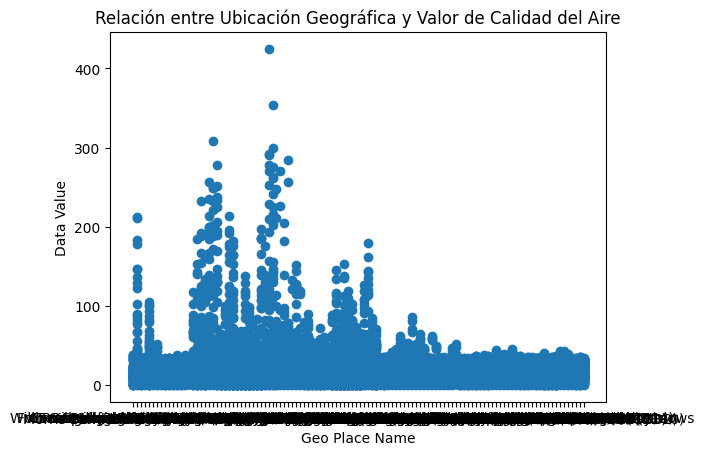

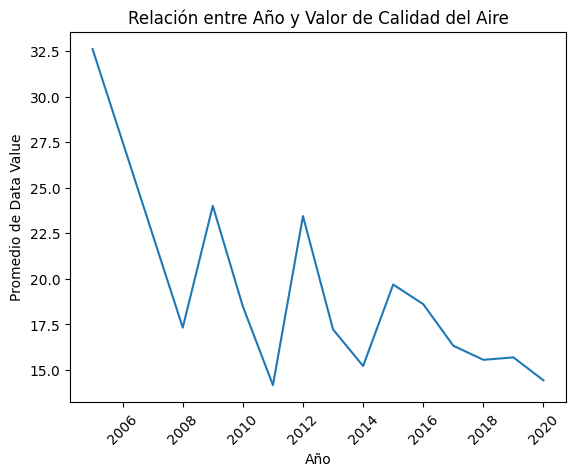

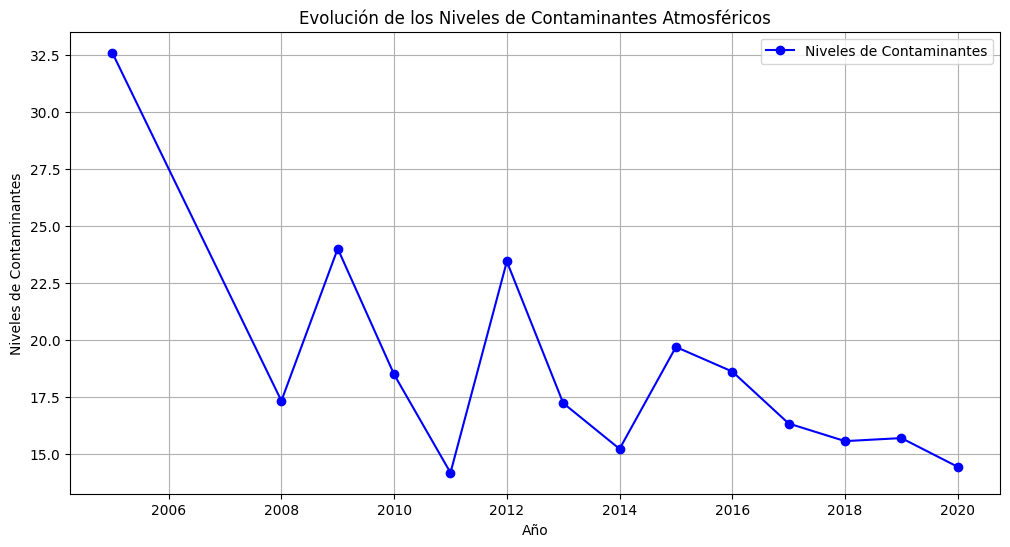

In [145]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar los datos desde el archivo CSV
df = pd.read_csv('Calidad_del_aire.csv')

# Gráfico de dispersión para la relación entre "Geo Place Name" y "Data Value"
plt.scatter(df['Geo Place Name'], df['Data Value'])
plt.xlabel('Geo Place Name')
plt.ylabel('Data Value')
plt.title('Relación entre Ubicación Geográfica y Valor de Calidad del Aire')
plt.show()

# Suponiendo que 'Start_Date' es una columna de fechas y 'Data Value' es la columna que se desea trazar
df['Start_Date'] = pd.to_datetime(df['Start_Date'])

# Agrupar los datos por año y tomar el promedio de los valores
df_grouped = df.groupby(df['Start_Date'].dt.year)['Data Value'].mean().reset_index()

# 2 formas de realizar el gráfico de líneas
# Crear el gráfico de líneas
plt.plot(df_grouped['Start_Date'], df_grouped['Data Value'])
plt.xlabel('Año')
plt.ylabel('Promedio de Data Value')
plt.title('Relación entre Año y Valor de Calidad del Aire')
plt.xticks(rotation=45)
plt.show()

# Suponiendo que 'Start_Date' es una columna de fechas y 'Data Value' es la columna que deseas trazar
df['Start_Date'] = pd.to_datetime(df['Start_Date'])

# Agrupa los datos por año y toma el promedio de los valores
df_grouped = df.groupby(df['Start_Date'].dt.year)['Data Value'].mean().reset_index()

# Crea el gráfico de líneas
plt.figure(figsize=(12, 6))
plt.plot(df_grouped['Start_Date'], df_grouped['Data Value'], marker='o', linestyle='-', color='b', label='Niveles de Contaminantes')
plt.title('Evolución de los Niveles de Contaminantes Atmosféricos')
plt.xlabel('Año')
plt.ylabel('Niveles de Contaminantes')
plt.grid(True)
plt.legend()
plt.show()


GRÁFICO DE DISPERSIÓN - Relación entre Ubicación Geográfica y Valor de Calidad del Aire:

Este gráfico muestra la relación entre la ubicación geográfica (en el eje x) y el valor de calidad del aire (en el eje y). Cada punto en el gráfico representa una medición de calidad del aire en una ubicación geográfica específica. Aquí está la interpretación:

Observando los puntos hay algunos que están dispersos por todo el gráfico y no siguen ningún patrón obvio, esto podría indicar que la calidad del aire varía en diferentes ubicaciones geográficas. En este caso, la ubicación geográfica podría ser un factor en la calidad del aire.

Se ven grupos de puntos cercanos entre sí o un patrón en forma de línea, podría sugerir que existe una correlación o relación entre la ubicación geográfica y la calidad del aire. Por ejemplo, áreas cercanas podrían tener valores de calidad del aire similares.

Se observan algunos valores atípicos (puntos que están muy lejos del grupo principal). Estos valores atípicos podrían indicar áreas con problemas especiales de calidad del aire.

GRÁFICO DE LÍNEAS - Relación entre Fecha de Inicio y Valor de Calidad del Aire:

Este gráfico muestra la relación entre la fecha de inicio (en el eje x) y el valor de calidad del aire (en el eje y). Cada punto en el gráfico representa una medición de calidad del aire en una fecha específica. Aquí está la interpretación:

El gráfico muestra una línea con un patrón claro, como un aumento o disminución de los valores de calidad del aire a lo largo del tiempo, esto indicaría una relación temporal. Por ejemplo, se podría observar estacionalidad en la calidad del aire con picos y valles en ciertas épocas del año.

Se podría observar en el gráfico que según la fecha se observan diferentes valores de calidad del aire.

Además, se observan cambios drásticos o fluctuaciones en ciertos puntos del tiempo. Estos cambios podrían indicar eventos específicos que afectan la calidad del aire, como incendios forestales, eventos climáticos extremos, o intervenciones humanas.

# Paso 4: Limpieza de datos
## Identificar y eliminar los valores faltantes
Utilizar funciones de Pandas como isna() o notna() para identificar los valores faltantes en el conjunto de datos. Esto creará una matriz booleana que muestra True donde los valores son faltantes y False donde están presentes.

In [146]:
import pandas as pd

df = pd.read_csv('Calidad_del_aire.csv')

# Crear una matriz booleana que indica si los valores son nulos
matriz_booleana = df.isna()

# Crear una matriz booleana que indica si los valores NO son nulos
matriz_booleana = df.notna()

# Contar la cantidad de valores faltantes por columna
cantidad_faltantes_por_columna = df.isna().sum()

# Crear una matriz booleana que muestra True donde los valores son faltantes en la columna 'Data Value'
valores_faltantes_data_value = df['Data Value'].isna()

print(matriz_booleana)
print(cantidad_faltantes_por_columna)

       Unique ID  Indicator ID  Name  Measure  Measure Info  Geo Type Name  \
0           True          True  True     True          True           True   
1           True          True  True     True          True           True   
2           True          True  True     True          True           True   
3           True          True  True     True          True           True   
4           True          True  True     True          True           True   
...          ...           ...   ...      ...           ...            ...   
16117       True          True  True     True          True           True   
16118       True          True  True     True          True           True   
16119       True          True  True     True          True           True   
16120       True          True  True     True          True           True   
16121       True          True  True     True          True           True   

       Geo Join ID  Geo Place Name  Time Period  Start_Date  Da

## Eliminación de Duplicados

La presencia de filas duplicadas en los datos puede afectar la precisión del análisis, ya que estas filas duplicadas pueden distorsionar los resultados. Se utiliza la función duplicated() en Pandas para identificar filas duplicadas en el DataFrame. Esto creará una serie booleana que muestra True para las filas duplicadas y False para las filas no duplicadas. Se puede observar que los resultados muestran False lo que indica que no hay filas duplicadas.

In [147]:
duplicados = df.duplicated()
print(duplicados)

0        False
1        False
2        False
3        False
4        False
         ...  
16117    False
16118    False
16119    False
16120    False
16121    False
Length: 16122, dtype: bool


## Eliminación de columnas innecesarias

Se utiliza la función drop() de Pandas para eliminar las columnas que se han identificado como innecesarias. El parámetro axis=1 indica que se están eliminando columnas. La lista de columnas a eliminar se proporciona como el primer argumento.

In [148]:
columnas_innecesarias = ['Message']
df = df.drop(columnas_innecesarias, axis=1)
print(columnas_innecesarias)

['Message']


## Guardar los Datos Limpios

Se utiliza la función to_csv() en Pandas para guardar los datos limpios en un nuevo archivo CSV. Se puede especificar el nombre del archivo y asegurar de que el índice no se incluya en el archivo resultante utilizando el parámetro index=False.

In [149]:
df.to_csv('nuevo_archivo.csv', index=False)

## Ordenación de Datos por Fecha
Asegurarse de que los datos estén ordenados cronológicamente por la fecha de medición. Se puede utilizar la función sort_values() de Pandas para ordenar el DataFrame según la columna de fecha.

In [150]:
df['Start_Date'] = pd.to_datetime(df['Start_Date'])
df = df.sort_values(by='Start_Date')
print('Start_Date')
print('sort_values')

Start_Date
sort_values


# Verificación de la ordenación
Se verifica que los datos estén ordenados correctamente. Se puede mostrar las primeras filas del DataFrame para confirmar que los registros están en orden cronológico.

In [151]:
print(df.head())

     Unique ID  Indicator ID  \
531     131051           653   
590     131157           655   
591     131158           655   
592     131159           655   
593     131160           655   

                                                  Name  \
531  O3-Attributable Asthma Emergency Department Vi...   
590            O3-Attributable Asthma Hospitalizations   
591            O3-Attributable Asthma Hospitalizations   
592            O3-Attributable Asthma Hospitalizations   
593            O3-Attributable Asthma Hospitalizations   

                                             Measure          Measure Info  \
531  Estimated Annual Rate- Children 0 to 17 Yrs Old  per 100,000 children   
590  Estimated Annual Rate- Children 0 to 17 Yrs Old  per 100,000 children   
591  Estimated Annual Rate- Children 0 to 17 Yrs Old  per 100,000 children   
592  Estimated Annual Rate- Children 0 to 17 Yrs Old  per 100,000 children   
593  Estimated Annual Rate- Children 0 to 17 Yrs Old  per 100,000 ch

# Paso 5: Comunicación de resultados

Después de un análisis exhaustivo de los datos de calidad del aire en Nueva York a lo largo de varios años, he obtenido valiosos hallazgos que arrojan luz sobre la evolución de la calidad del aire en la ciudad. Mi estudio se ha centrado en la recopilación, limpieza y análisis de datos relacionados con indicadores clave de contaminación atmosférica, como el ozono (O3) y el dióxido de azufre (SO2).

En primer lugar, he identificado patrones estacionales y tendencias a lo largo de los años que nos indican cuándo los niveles de contaminantes atmosféricos tienden a aumentar o disminuir. Esto es fundamental para comprender la variabilidad de la calidad del aire y su impacto en la salud pública.

He observado que la calidad del aire varía significativamente según la ubicación geográfica en la ciudad, lo que permite identificar áreas con niveles de contaminación más altos y, por lo tanto, áreas que podrían requerir una atención especial en términos de políticas ambientales.

Además, he explorado la relación entre la calidad del aire y la salud pública. Si bien el análisis se centra en los datos de calidad del aire, he identificado la importancia de investigaciones adicionales que vinculen los hallazgos con problemas de salud, como enfermedades respiratorias, lo que podría respaldar futuras investigaciones y políticas de salud pública.

Esta comunicación tiene como objetivo crear conciencia sobre la calidad del aire a largo plazo en Nueva York y respaldar la toma de decisiones informadas para abordar problemas ambientales.

En resumen, el análisis a largo plazo ha proporcionado una visión más completa de la evolución de la calidad del aire en Nueva York y ha contribuido a una comprensión más profunda de los patrones y tendencias ambientales a lo largo del tiempo. Esperamos que esta información sea útil para mejorar la calidad del aire y la salud pública en la ciudad.